# 파이썬 기반의 AI를 위한 기초수학, 확률및통계

In [1]:
## 강봉주 
## bonjour.kang@gmail.com
##
## 데이터 기술
##

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# 필요한 패키지
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 한글출력
plt.rcParams['font.family'] = 'AppleGothic' #  Windows 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

pd.__version__

'2.2.3'

## [BANK] 데이터

In [4]:
# 경로 정의
url = 'https://github.com/bong-ju-kang/kmu-mba-statistics-winter/raw/master/data/bank.zip'

# 데이터 읽기
df = pd.read_csv(url)
df.shape

(4521, 17)

## 범주형 자료의 기술

In [5]:
# 빈도 보기
df['marital'].value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

In [6]:
# 빈도 비율 보기
cnt = df['marital'].value_counts()
np.round(cnt / cnt.sum(), 3)

marital
married     0.619
single      0.265
divorced    0.117
Name: count, dtype: float64

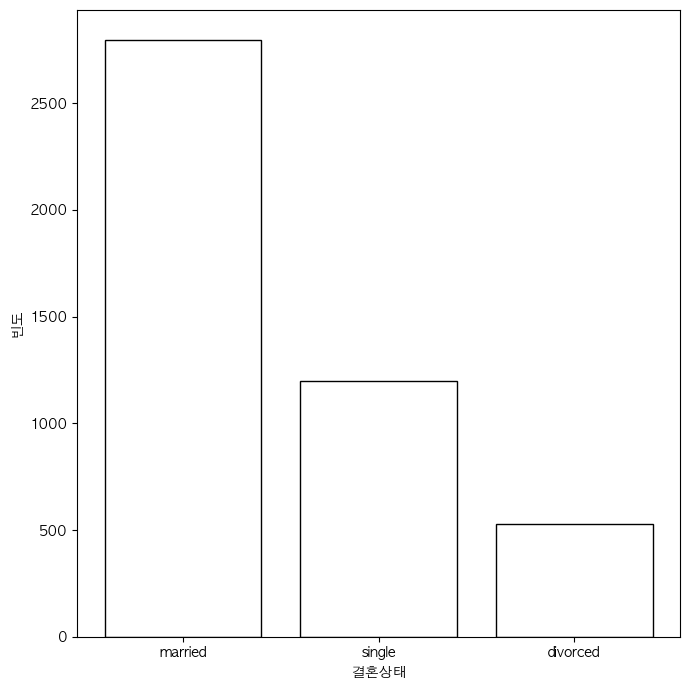

In [7]:
# 그래프 표현
fig, ax = plt.subplots(figsize=(7, 7))
ax.bar(df['marital'].value_counts().index, df['marital'].value_counts(), color='white', edgecolor='black')
ax.set_xlabel('결혼상태')
ax.set_ylabel('빈도')

plt.tight_layout()

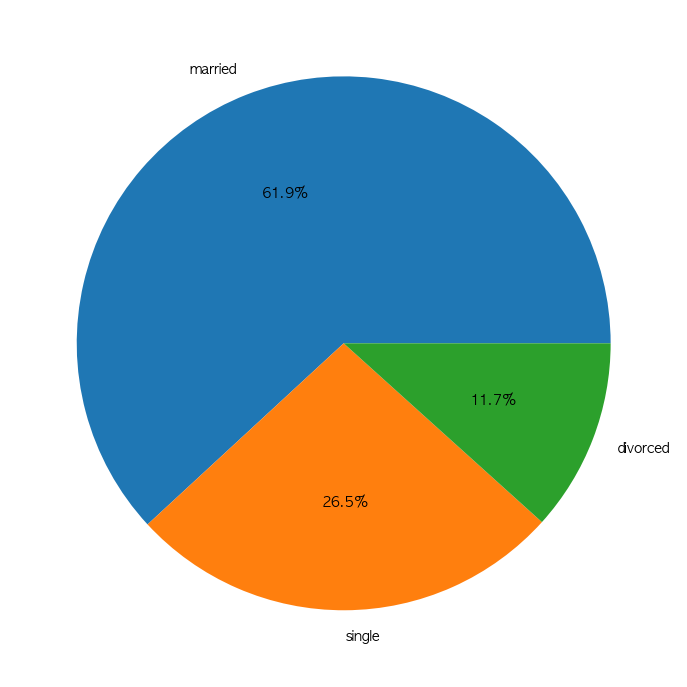

In [8]:
# 원 도표
fig, ax = plt.subplots(figsize=(7, 7))

# 앞의 %는 포맷을 표시하기 위한 것이며 뒤의 %%는 % 표시하기 위하여 %%가 된 것임
ax.pie(df['marital'].value_counts(), labels=df['marital'].value_counts().index, autopct='%1.1f%%')

plt.tight_layout()

## 연속형 자료의 기술

In [9]:
# 갖을 수 있는  모든 값에 대한 빈도
df['age'].value_counts(sort=False)

age
30    150
33    186
35    180
59     71
36    188
     ... 
86      1
74      3
76      2
87      1
84      1
Name: count, Length: 67, dtype: int64

In [10]:
# 값들의 그룹화
df['age'].value_counts(bins=10, sort=False)

(18.930999999999997, 25.8]     111
(25.8, 32.6]                   944
(32.6, 39.4]                  1235
(39.4, 46.2]                   869
(46.2, 53.0]                   706
(53.0, 59.8]                   482
(59.8, 66.6]                   100
(66.6, 73.4]                    36
(73.4, 80.2]                    30
(80.2, 87.0]                     8
Name: count, dtype: int64

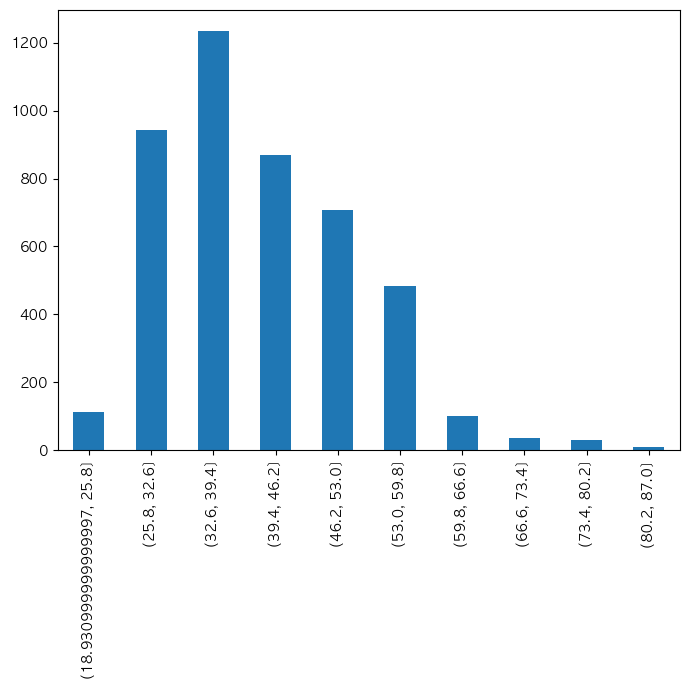

In [11]:
# 값들의 그룹화 도표
fig, ax = plt.subplots(figsize=(7, 7))
ax = df['age'].value_counts(bins=10, sort=False).plot.bar()
plt.tight_layout()

In [12]:
# 요약 통계량 기반의 분포 모습 확인
df['age'].describe()

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

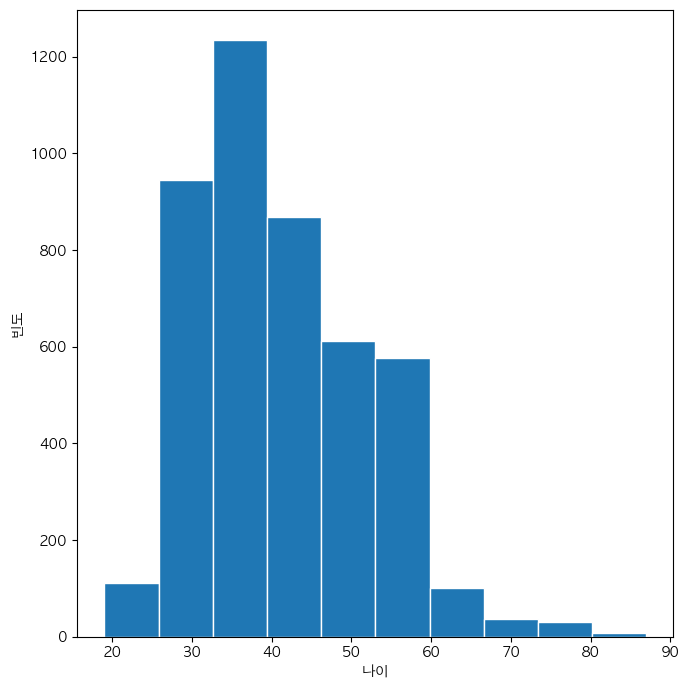

In [13]:
# 히스토그램: 연속형 변수의 분포 확인
fig, ax = plt.subplots(figsize=(7, 7))

ax.hist(df['age'], bins=10, edgecolor='white')
ax.set_xlabel('나이')
ax.set_ylabel('빈도')

plt.tight_layout()

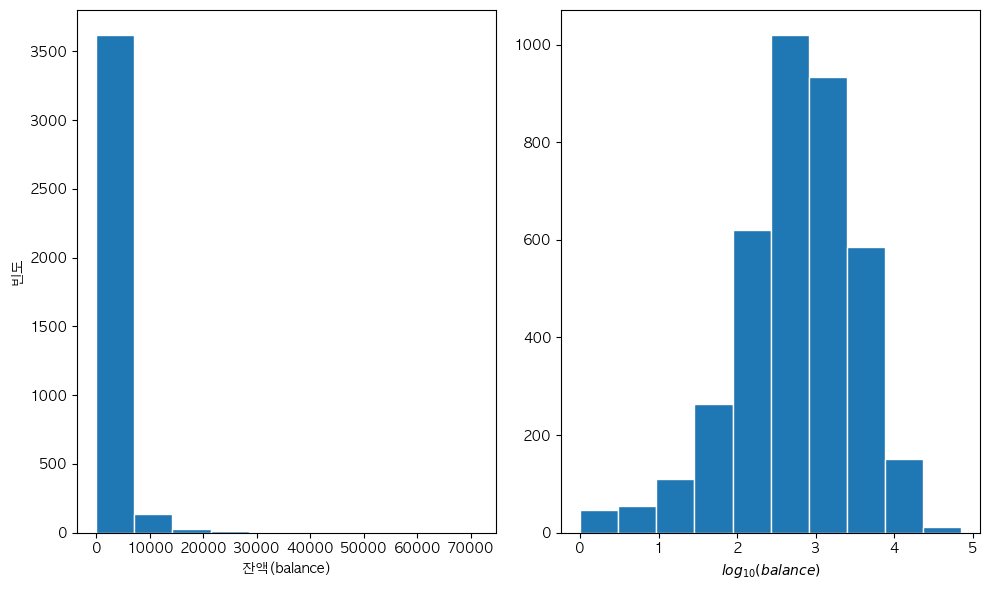

In [14]:
# 데이터 구성
x = df.loc[df['balance']> 0, 'balance']
logx = np.log10(x)

# 그래프 표현
fig, ax = plt.subplots(figsize=(10, 6), ncols=2)

ax[0].hist(x, bins=10, edgecolor='white')
ax[0].set_xlabel('잔액(balance)')
ax[0].set_ylabel('빈도')

ax[1].hist(logx, bins=10, edgecolor='white')
ax[1].set_xlabel(r'$log_{10}(balance)$' )

plt.tight_layout()

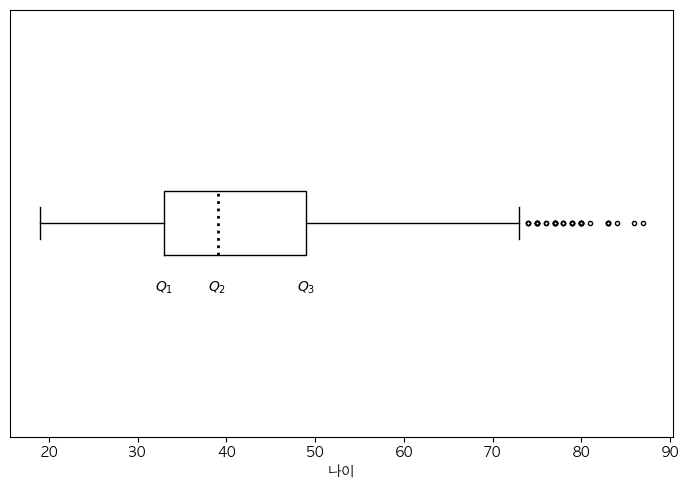

In [15]:
# 상자 그림
q1 = df['age'].describe()['25%']
median = df['age'].describe()['50%']
q3 = df['age'].describe()['75%']

fig, ax = plt.subplots(figsize=(7, 5))
ax.boxplot(df['age'], vert=False, sym='.', showmeans=False,
           medianprops={'lw':2,  'color':'k', 'ls':':'})

ax.annotate(r'$Q_1$', np.array([q1, 0.85]), va='center', ha='center')
ax.annotate(r'$Q_2$', np.array([median, 0.85]), va='center', ha='center')
ax.annotate(r'$Q_3$', np.array([q3, 0.85]), va='center', ha='center')

ax.set_xlabel('나이')
ax.set_yticks([])

plt.tight_layout()

In [16]:
# 표본 분산의 계산
# 분모는 데이터의 개수 - ddof 이므로
sample_variance = np.var(df['age'], ddof=1)

# 표준 편차
np.sqrt(sample_variance).round(3)

np.float64(10.576)